**Garbage Classification using Custom CNN **

In [5]:
from google.colab import files
files.upload()  # Manually upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashutoshiwale12","key":"17741113fb99cc047b711696185d9526"}'}

In [6]:
!pip install kaggle


In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d techsash/waste-classification-data --unzip -p /content/dataset

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 99% 425M/427M [00:23<00:00, 22.6MB/s]
100% 427M/427M [00:23<00:00, 19.4MB/s]


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import os

import warnings
warnings.filterwarnings('ignore') #Suppress all the warnings and proceeds execution of code

dataset_path = "/content/dataset"
for dirname, _, filenames in os.walk(dataset_path):
    print(f"📂 Directory: {dirname}")
    for filename in filenames[:5]:  # Show first 5 files
        print(f"  📄 {filename}")

📂 Directory: /content/dataset
📂 Directory: /content/dataset/DATASET
📂 Directory: /content/dataset/DATASET/TRAIN
📂 Directory: /content/dataset/DATASET/TRAIN/R
  📄 R_4274.jpg
  📄 R_6028.jpg
  📄 R_5479.jpg
  📄 R_6654.jpg
  📄 R_4904.jpg
📂 Directory: /content/dataset/DATASET/TRAIN/O
  📄 O_6076.jpg
  📄 O_1919.jpg
  📄 O_1319.jpg
  📄 O_3459.jpg
  📄 O_4676.jpg
📂 Directory: /content/dataset/DATASET/TEST
📂 Directory: /content/dataset/DATASET/TEST/R
  📄 R_10254.jpg
  📄 R_11080.jpg
  📄 R_10885.jpg
  📄 R_10339.jpg
  📄 R_10811.jpg
📂 Directory: /content/dataset/DATASET/TEST/O
  📄 O_13516.jpg
  📄 O_13697.jpg
  📄 O_13399.jpg
  📄 O_13197.jpg
  📄 O_13406.jpg
📂 Directory: /content/dataset/dataset
📂 Directory: /content/dataset/dataset/DATASET
📂 Directory: /content/dataset/dataset/DATASET/TRAIN
📂 Directory: /content/dataset/dataset/DATASET/TRAIN/R
  📄 R_4274.jpg
  📄 R_6028.jpg
  📄 R_5479.jpg
  📄 R_6654.jpg
  📄 R_4904.jpg
📂 Directory: /content/dataset/dataset/DATASET/TRAIN/O
  📄 O_6076.jpg
  📄 O_1919.jpg
  📄 

In [12]:
train_path = "/content/dataset/dataset/DATASET/TRAIN"
test_path = "/content/dataset/dataset/DATASET/TEST"

In [13]:
#!pip install --upgrade tensorflow keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils import plot_model
from glob import glob

Functionality

1️⃣ Traverses category subdirectories inside train_path/.

2️⃣ Loads images, converts them from BGR to RGB.

3️⃣ Extracts category name from the directory path.

4️⃣ Stores image data in x_data and labels in y_data.

5️⃣ Creates a Pandas DataFrame data with image and label columns.

In [14]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 12565/12565 [00:06<00:00, 1996.65it/s]


In [15]:
data.shape

(22564, 2)

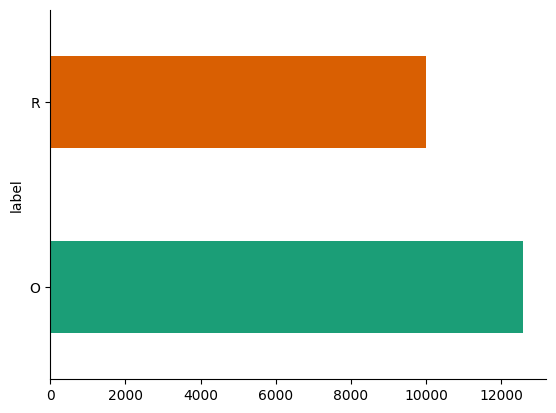

In [16]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

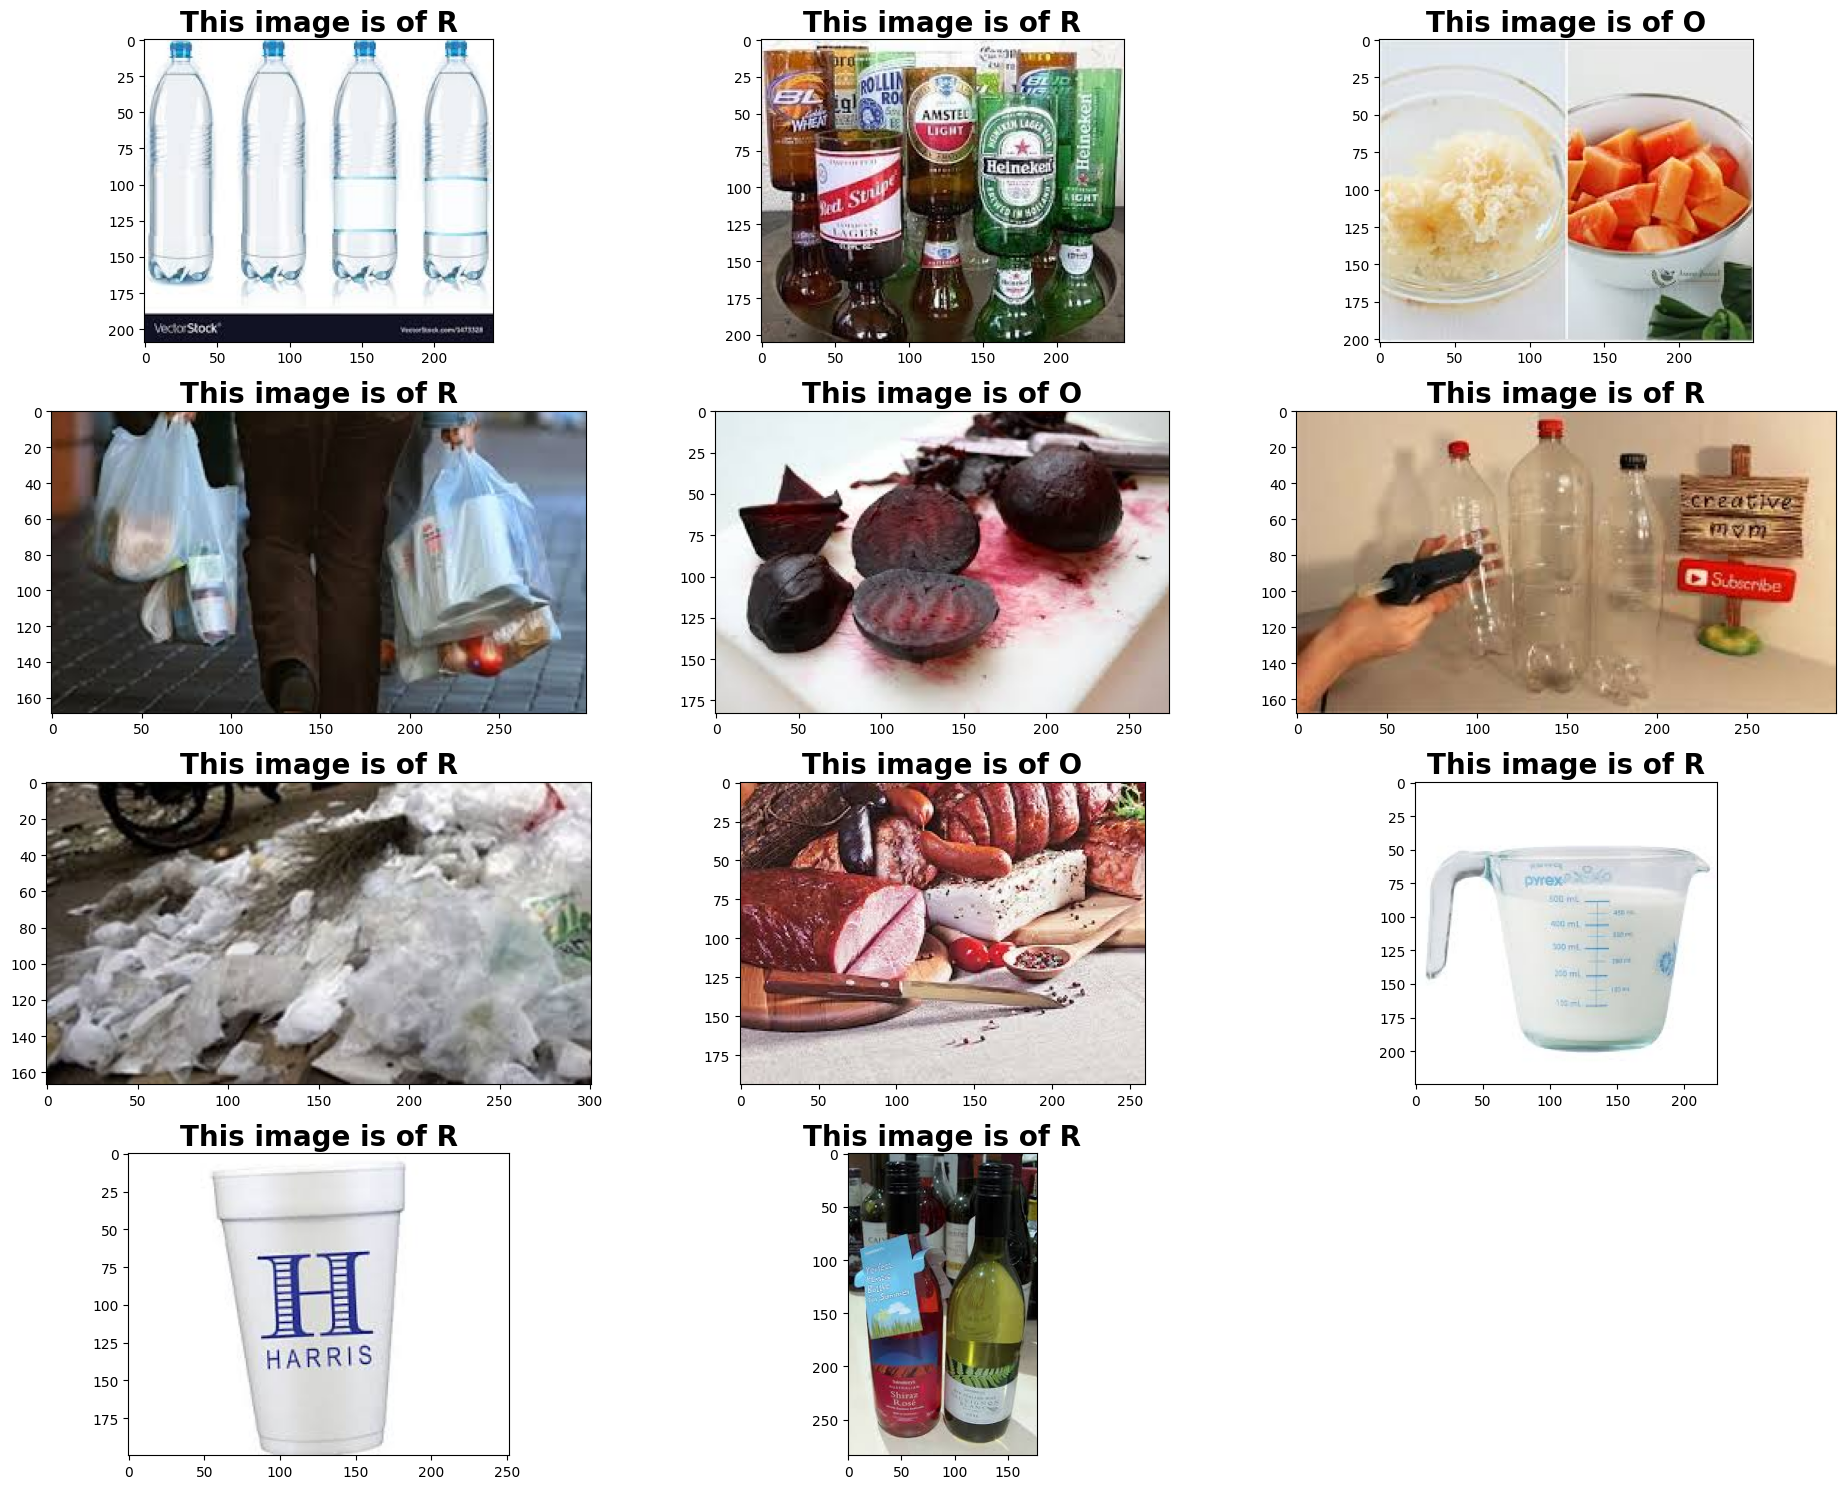

In [17]:
plt.figure(figsize=(20,15))
for i in range(11):
  plt.subplot(4,3,(i%12)+1) #makes sure to put max 11 images in the plot, if exceeds, it resets to 1
  index=np.random.randint(15000)
  plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
  plt.imshow(data.image[index])#getting image from array using random index
  plt.tight_layout() #Ensuring that the title and images do not overlap

In [18]:
className =  glob(train_path + '/*')
numberofclass = len(className)
print("Number of class", numberofclass)

Number of class 2


# Convolutional Neural Network - **CNN**

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberofclass))
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256


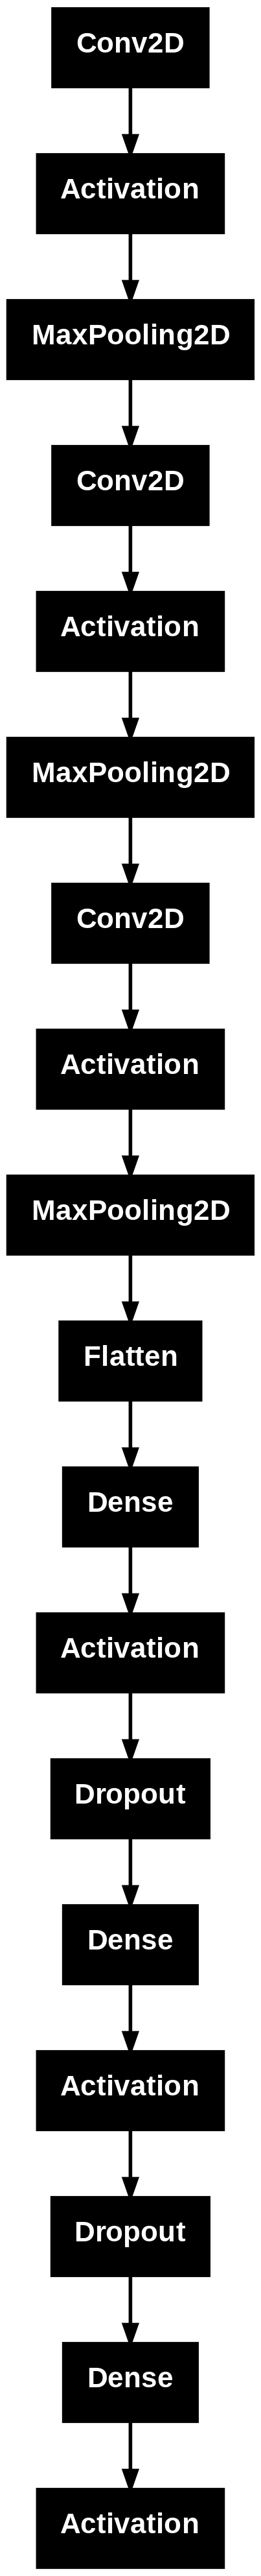

In [20]:
plot_model(model)

In [21]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [22]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [25]:
hist = model.fit(
        train_generator,
        epochs=10,
        validation_data=test_generator)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 92s 764ms/step - accuracy: 0.7098 - loss: 0.6530 - val_accuracy: 0.8647 - val_loss: 0.3798
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 52s 581ms/step - accuracy: 0.8184 - loss: 0.4439 - val_accuracy: 0.8647 - val_loss: 0.3471
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 572ms/step - accuracy: 0.8399 - loss: 0.3909 - val_accuracy: 0.8794 - val_loss: 0.3186
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 575ms/step - accuracy: 0.8505 - loss: 0.3740 - val_accuracy: 0.8846 - val_loss: 0.2956
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 572ms/step - accuracy: 0.8717 - loss: 0.3305 - val_accuracy: 0.8902 - val_loss: 0.2977
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 572ms/step - accuracy: 0.8756 - loss: 0.3188 - val_accuracy: 0.8866 - val_loss: 0.2919
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 575ms/step - accuracy: 0.8904 - loss: 0.2835 - val_accuracy: 0.8922 - val_loss: 0.3034
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 568ms/step - accuracy: 0.8975 - loss: 0.2563 - val_accu

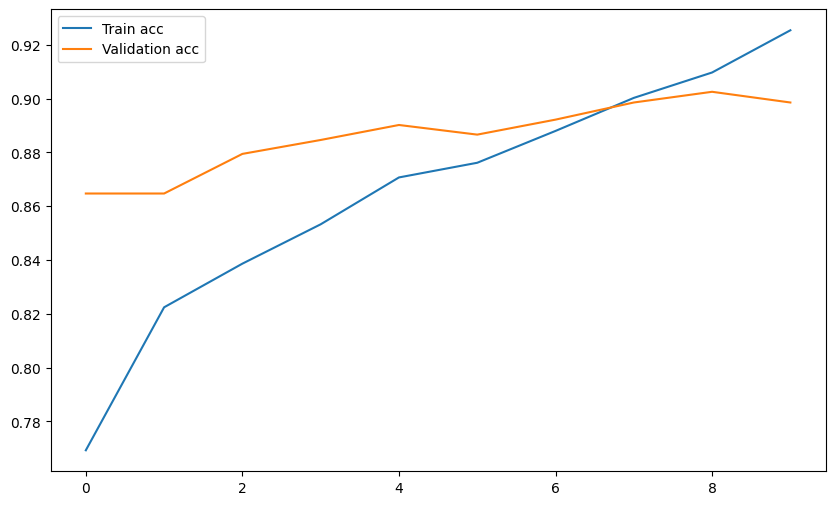

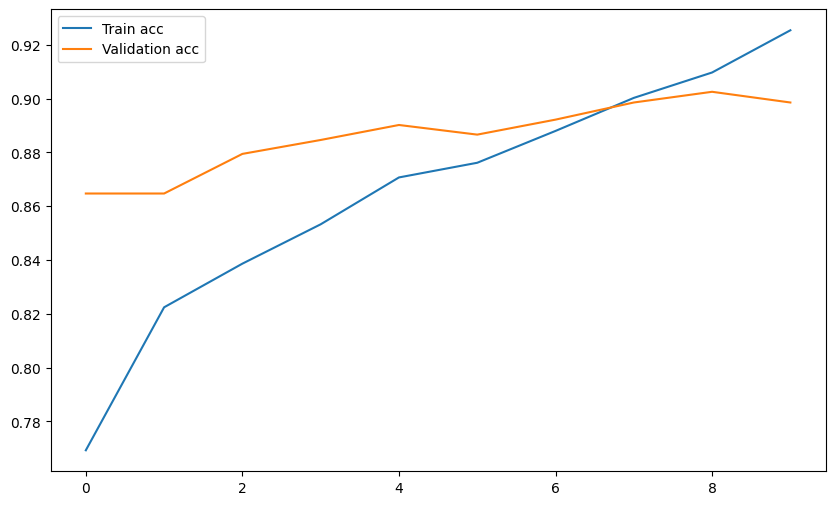

In [26]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [27]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
This image -> Organic


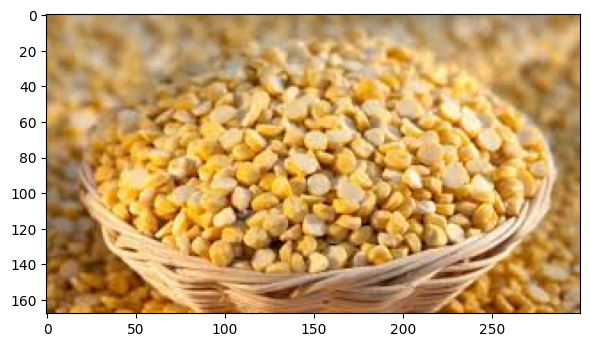

In [31]:
import cv2
test_img = cv2.imread("/content/dataset/DATASET/TEST/O/O_13516.jpg")
predict_func(test_img)